In [93]:
import glob

import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline
NAME='model-architecture'

In [131]:
results = glob.glob('../results/model-architecture*/training_history.csv')
results = [pd.read_csv(res) for res in results]
results = pd.concat(results)
results['model'] = results['dir'].str.replace('results/'+NAME+'-', '')

In [134]:
best_loss

,dir,val_score
0,results/model-architecture-Unet-128x800-resnet...,0.867191
1,results/model-architecture-Unet-128x800-resnet...,0.869019
2,results/model-architecture-Unet-128x800-seresn...,0.881038
3,results/model-architecture-PSPNet-240x1584-res...,0.897265
4,results/model-architecture-PSPNet-240x1584-ser...,0.903521
5,results/model-architecture-FPN-128x800-seresne...,0.907507
6,results/model-architecture-PSPNet-144x912-resn...,0.909077
7,results/model-architecture-PSPNet-144x912-sere...,0.911507


In [95]:
results.groupby('model').max()[['epoch', 'val_score']].sort_values('val_score')

,epoch,val_score
model,,
Unet-128x800-resnet34-batch16-SGD-lr0.01-dice_bce_loss,7,0.867191
Unet-128x800-resnet18-batch16-SGD-lr0.01-dice_bce_loss,8,0.869019
Unet-128x800-seresnet18-batch16-SGD-lr0.01-dice_bce_loss,10,0.881038
PSPNet-240x1584-resnet18-batch16-SGD-lr0.01-dice_bce_loss,16,0.897265
PSPNet-240x1584-seresnet18-batch16-SGD-lr0.01-dice_bce_loss,32,0.903521
FPN-128x800-seresnet18-batch16-SGD-lr0.005-dice_bce_loss,25,0.907507
PSPNet-144x912-resnet18-batch16-SGD-lr0.01-dice_bce_loss,37,0.909077
PSPNet-144x912-seresnet18-batch16-SGD-lr0.01-dice_bce_loss,46,0.911507


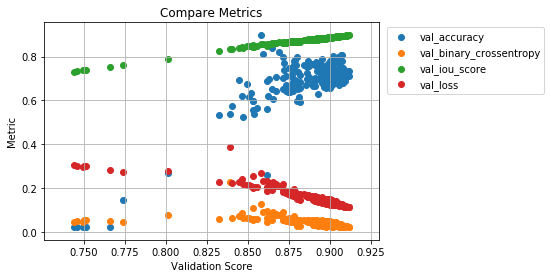

In [96]:
ax = plt.axes()
plt.scatter(x=results['val_score'], y=results['val_acc'],                 label='val_accuracy')
plt.scatter(x=results['val_score'], y=results['val_binary_crossentropy'], label='val_binary_crossentropy')
plt.scatter(x=results['val_score'], y=results['val_iou_score'],           label='val_iou_score')
plt.scatter(x=results['val_score'], y=results['val_loss'],                label='val_loss')
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.title('Compare Metrics')
plt.ylabel('Metric')
plt.xlabel('Validation Score')
plt.grid()

Text(0,0.5,'dice score')

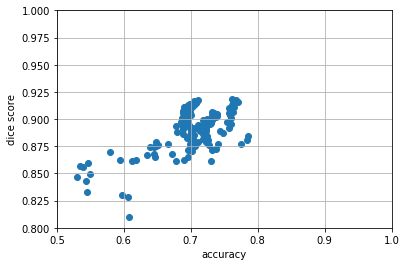

In [97]:
plt.scatter(x=results['acc'], y=results['score'])
plt.grid()
plt.xlim(0.5, 1.0)
plt.xlabel('accuracy')
plt.ylim(0.8, 1.0)
plt.ylabel('dice score')

Text(0,0.5,'score')

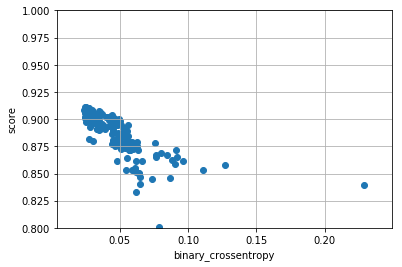

In [98]:
plt.scatter(x=results['val_binary_crossentropy'], y=results['val_score'])
plt.grid()
plt.ylim(0.8, 1.0)
plt.xlabel('binary_crossentropy')
plt.ylabel('score')

Text(0,0.5,'score')

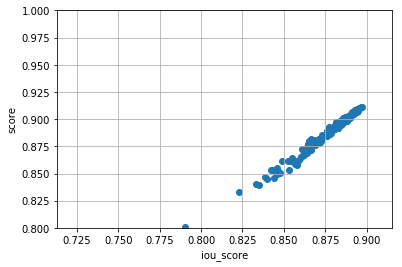

In [99]:
plt.scatter(x=results['val_iou_score'], y=results['val_score'])
plt.grid()
plt.ylim(0.8, 1.0)
plt.xlabel('iou_score')
plt.ylabel('score')

In [100]:
def plot_feature(models, feature, ylim=(0.,1.)):
    ax = plt.axes()
    for m in models:
        results[results['model'] == m][[feature]].plot(ax=ax, ylim=ylim)
    plt.legend(models, bbox_to_anchor=(1.01, 1), loc='upper left')
    plt.title('Compare ' + feature)
    plt.ylabel(feature)
    plt.xlabel('Epoch')
    plt.grid()

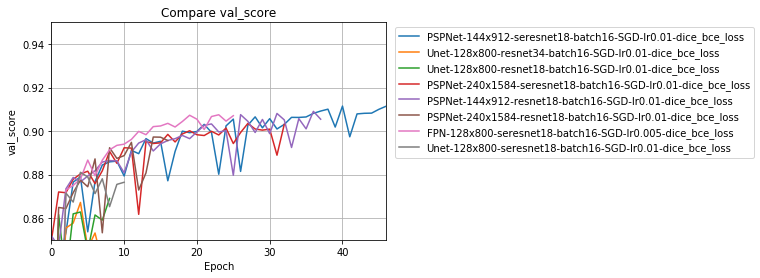

In [101]:
plot_feature(results['model'].unique(), 'val_score', ylim=(0.85, 0.95))

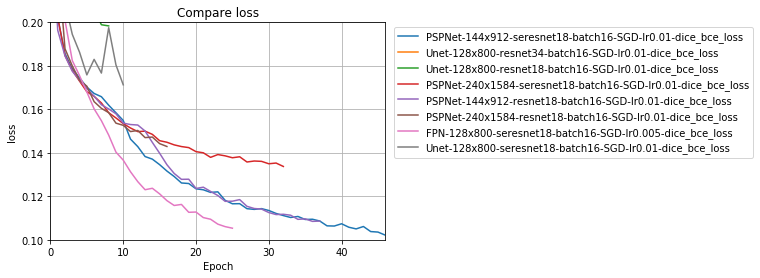

In [102]:
plot_feature(results['model'].unique(), 'loss', ylim=(0.1, 0.2))

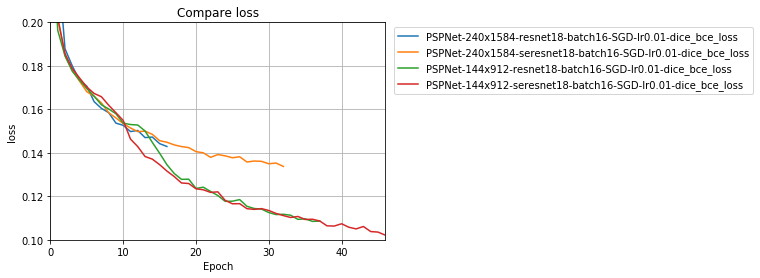

In [103]:
plot_feature([
    'PSPNet-240x1584-resnet18-batch16-SGD-lr0.01-dice_bce_loss',
    'PSPNet-240x1584-seresnet18-batch16-SGD-lr0.01-dice_bce_loss',
    'PSPNet-144x912-resnet18-batch16-SGD-lr0.01-dice_bce_loss',
    'PSPNet-144x912-seresnet18-batch16-SGD-lr0.01-dice_bce_loss'
], 'loss', ylim=(0.1, 0.2))

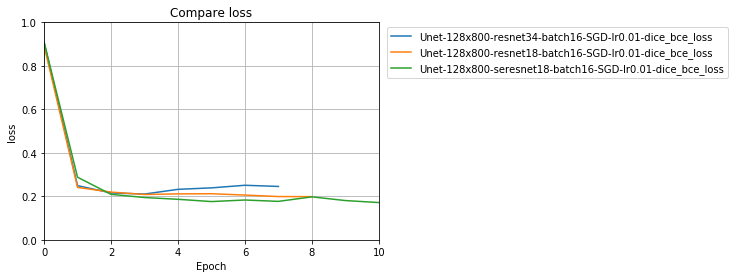

In [104]:
plot_feature([
    'Unet-128x800-resnet34-batch16-SGD-lr0.01-dice_bce_loss',
    'Unet-128x800-resnet18-batch16-SGD-lr0.01-dice_bce_loss',
    'Unet-128x800-seresnet18-batch16-SGD-lr0.01-dice_bce_loss'
], 'loss')

In [2]:
y_pred = np.ones((7, 10, 10, 4))
y_true = np.zeros((7, 10, 10, 4))

weights = K.constant(np.array([1., 1., 1., 1.]))
y_pred = K.variable(y_pred)
y_true = K.variable(y_true)

In [33]:
y_true * y_pred

<tf.Tensor: id=22, shape=(7, 10, 10, 4), dtype=float32, numpy=
array([[[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        ...,

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
      